In [16]:
import os
import paltas
from astropy.visualization import simple_norm
import visualization_utils
from paltas import generate
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20


plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

%matplotlib inline
root_path = paltas.__path__[0][:-7]
import re

In [17]:
%load_ext autoreload
%autoreload 2
%matplotlib inline


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### paltas PSF library

In [18]:
# psf_im = np.load('data/psf_images.npy', mmap_mode='r+')

In [19]:
# psf_im_i = psf_im[:, 1, :, :]

In [20]:
# # index = np.random.randint(0, psf_im_i.shape[0])
# index = 0
# psf_kernels = psf_im_i[index, :, :]
# psf_kernels[psf_kernels<0] = 0
# plt.imshow(psf_kernels);

In [21]:
# psf_sums = np.sum(psf_im_i,axis=(1,2))

In [22]:
# psf_sums = psf_sums.reshape(-1,1,1)

In [23]:
# normalized = psf_im_i/psf_sums
# normalized

In [24]:
# import tensorflow as tf
# normalized = tf.constant(normalized)
# pad_tns = tf.constant([[0, 0],[0,1],[0,1]])
# # -----------padding: ^first_dim^
# # ------------------------padding: ^second_dim^
# # ---------------------------------------padding: ^third_dim^

# # Generating padded Tensor
# res = tf.pad(normalized, pad_tns, mode ='CONSTANT', constant_values=0)
# print(res.shape)


In [25]:
# np.save('data/norm_resize_psf.npy', res)

In [26]:
# #plt.hist(normalized[0, :, 17], alpha=0.5)

# #plt.hist(normalized[0, :, 16], alpha = 0.5)
# plt.plot(normalized[0, :, 15], alpha=0.5, label=15)
# plt.plot(normalized[0, :, 16], alpha=0.5, label=16)
# plt.plot(normalized[0, :, 17], alpha=0.5, label=17)
# plt.plot(normalized[0, :, 18], alpha=0.5, label=18)
# plt.axvline(32//2)
# plt.legend()

In [27]:
# #plt.hist(normalized[0, :, 17], alpha=0.5)

# #plt.hist(normalized[0, :, 16], alpha = 0.5)
# plt.plot(normalized[0, 15, :], alpha=0.5, label=15)
# plt.plot(normalized[0, 16, :], alpha=0.5, label=16)
# plt.plot(normalized[0, 17, :], alpha=0.5, label=17)
# plt.plot(normalized[0, 18, :], alpha=0.5, label=18)
# plt.axvline(32//2)
# plt.legend()

In [28]:
# fig, ax = plt.subplots(1, 1, figsize=(6, 6))
# # ax[0].imshow(normalized_resized[0, :, :])
# ax.imshow(normalized[0, :, :])
# # ax[0].set_title('resized PSF: 31x31')
# ax.set_title('original PSF: 32x32')

In [29]:
# plt.hist(psf_sums.flatten(), density=True, bins=100);
# plt.title("PSF Sum Distribution")
# plt.xlabel("Sum of pixel in PSF kernel");

### Generate

In [30]:
config_file = 'config_LSST'

In [31]:
from paltas.Configs.config_handler import ConfigHandler

# We'll pass one of our example Configs in
config_handler = ConfigHandler(os.path.join(root_path,'paltas/notebooks/config_LSST.py'))

# First let's get the lenstronomy model lists, kwargs lists, and redshift lists.
kwargs_model, kwargs_params = config_handler.get_lenstronomy_models_kwargs()

# We can see what keys are returned, and inspect the lens models in particular
print('Available Keys:')
print(kwargs_model.keys())
print(kwargs_params.keys())
print('')

print('lens_model_list')
print(kwargs_model['lens_model_list'])
print('kwargs_lens')
print()
print(kwargs_params['kwargs_lens_light'])


Available Keys:
dict_keys(['lens_model_list', 'lens_redshift_list', 'lens_light_model_list', 'point_source_model_list', 'source_light_model_list', 'source_redshift_list', 'multi_plane', 'z_source', 'z_source_convention'])
dict_keys(['kwargs_lens', 'kwargs_lens_light', 'kwargs_ps', 'kwargs_source'])

lens_model_list
['EPL_NUMBA', 'SHEAR']
kwargs_lens

[{'R_sersic': 1.9863241533482103, 'center_x': -0.04807061801380639, 'center_y': 0.031019165385334415, 'e1': 0.08691509777166688, 'e2': -0.3663599373040671, 'n_sersic': 4.00663338542782, 'amp': 18.06988867816081}]


In [32]:
kwargs_params['kwargs_lens'][0]['theta_E']

0.35690688101743245

In [33]:
img, prop = config_handler.draw_image(new_sample=True)

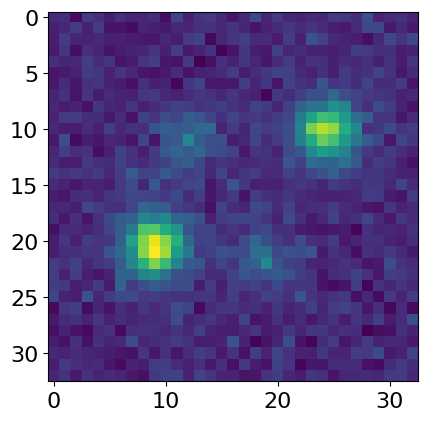

In [34]:
plt.imshow(img)

In [35]:
# command = f'python3 ../paltas/generate.py {config_file}.py generated_images/test/{config_file} --n 1556 --tf_record'

In [37]:
# os.system(command = command)
config_file

'config_LSST'

In [39]:
command = f'python3 ../paltas/generate.py {config_file}.py generated_images/train_with_lens/{config_file} --n 100000 --tf_record --h5'

In [40]:
os.system(command = command)


/Users/padmavenkatraman/Documents/StrongLensing/silver/lib/python3.11/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


Save folder path: generated_images/train_with_lens/config_LSST


/Users/padmavenkatraman/Documents/StrongLensing/paltas/paltas/Sampling/sampler.py:113: UserWarning: Parameter center_x in cross dict specified elsewhere! Will be overwritten. This warning only flags once, but other parameters may also be overwritten.
  warnings.warn('Parameter %s in cross dict specified '%(param)
  0%|          | 0/100000 [00:00<?, ?it/s]/Users/padmavenkatraman/Documents/StrongLensing/paltas/paltas/Configs/config_handler.py:376: RuntimeWarning: Parameter (psf_parameters, kernel_point_source) in config_dict, and possibly others, will not be written to metadata.csv
  warnings.warn(
100%|██████████| 100000/100000 [19:45<00:00, 84.36it/s]


Dataset generation complete. Acceptance rate: 1.000
Saving 100000 files into the tf record


  4%|▍         | 4188/100000 [9:06:53<211:13:25,  7.94s/it]

In [1]:
import paltas.Analysis.dataset_generation as dg

In [13]:
dg.generate_tf_record('generated_images/train_with_lens/config_LSST/',['main_deflector_parameters_theta_E',
	'main_deflector_parameters_gamma1','main_deflector_parameters_gamma2',
	'main_deflector_parameters_gamma','main_deflector_parameters_e1',
	'main_deflector_parameters_e2','main_deflector_parameters_center_x',
	'main_deflector_parameters_center_y'],'generated_images/train_with_lens/config_LSST/metadata.csv',
	'generated_images/train_with_lens/config_LSST/data.tfrecord',h5=True)

Saving 100000 files into the tf record


  0%|          | 1/100000 [00:15<437:17:52, 15.74s/it]


KeyboardInterrupt: 

In [8]:
import paltas.Sampling.distributions as dist
from scipy.stats import norm, truncnorm, uniform
import matplotlib.pyplot as plt


(array([ 20.,  52., 104., 174., 234., 182., 122.,  80.,  22.,  10.]),
 array([-1.29682031, -1.02093001, -0.7450397 , -0.46914939, -0.19325908,
         0.08263123,  0.35852154,  0.63441185,  0.91030215,  1.18619246,
         1.46208277]),
 <BarContainer object of 10 artists>)

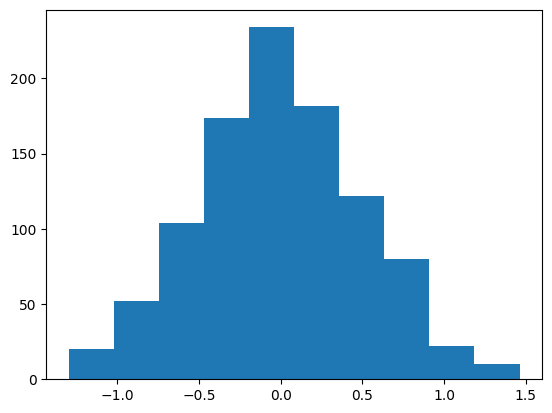

In [12]:

plt.hist(norm(loc=0,scale=0.5).rvs(size=1000))

In [35]:
config_file_path = f'generated_images/no_lens/{config_file}/'

file_list = [os.path.join(config_file_path, i) for i in os.listdir(config_file_path)]
names = np.arange(100).astype(str)


In [36]:
df = pd.read_csv(f'generated_images/no_lens/{config_file}/metadata.csv', index_col=0)

In [37]:
start_index = np.random.randint(0, 100 - 24)
picked_files = file_list[start_index:start_index + 24]
picked_names = names[start_index:start_index + 24]
picked_names

array(['70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80',
       '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91',
       '92', '93'], dtype='<U21')

In [26]:
%matplotlib inline
visualization_utils.matrix_plot_from_npy(picked_files,names=picked_names,dim=(3,8),
                                         save_name='lsst.png',stretch = 'asinh',asinh_a = 0.1,
                                         annotate=False)
plt.show()
# visualization_utils.matrix_plot_from_npy(picked_files,names=picked_names,dim=(3,8),
#                                          save_name='lsst.png',asinh_a = 0.1, max_cut = 70, annotate=True)
# plt.show()

NameError: name 'picked_files' is not defined

In [ ]:
# weights = sorted(os.listdir('train_results/model_weights'))
# losses = pd.read_csv('train_results/train.csv', index_col=0)
# file_list_bad= []
# num_files = len(weights)
# for i in range (num_files):
# # weights[0][-12:-8]
#     print(weights[i])
#     ind = int(weights[i][1:3])
#     ls = float(weights[i][-12:-8])
#     valloss = np.round(losses.loc[ind-1, 'val_loss'], 2)
#     # print(type(valloss), type(ls))
#     if not np.isclose(valloss,ls):
#         print(ind, 'latest loss: ', valloss, 'loss_on_file: ', ls)
#         file = f'train_results/model_weights/{weights[i]}'
#         file_list_bad.append(file)

In [ ]:
# losses = pd.read_csv('train_results/train.csv', index_col=0)
# epochs = len(losses['val_loss'])
# losses

In [ ]:
# losses = pd.read_csv('train_results/train.csv', index_col=0)
# epochs = losses.index
# plt.plot(epochs, losses['loss'], label='Training Loss')
# plt.plot(epochs, losses['val_loss'], label='Validation Loss')
# plt.legend()
# plt.title("Training Loss")

In [6]:
os.system(command = f'python ../paltas/Analysis/train_model.py lsst_train.py --tensorboard_dir NLNORM')

/Users/padmavenkatraman/Documents/StrongLensing/silver/lib/python3.11/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


Checking for training data.
TFRecord found at generated_images/no_lens/config_LSST/data.tfrecord
Checking for validation data.
TFRecord found at generated_images/no_lens_valid/config_LSST/data.tfrecord
Checking for normalization csv
Using input normalization found at generated_images/no_lens/config_LSST/norms.csv
Initializing the model


/Users/padmavenkatraman/Documents/StrongLensing/paltas/paltas/Analysis/dataset_generation.py:310: UserWarning: No noise will be added
  warnings.warn('No noise will be added')
/Users/padmavenkatraman/Documents/StrongLensing/paltas/paltas/Analysis/dataset_generation.py:310: UserWarning: No noise will be added
  warnings.warn('No noise will be added')


Is model built: True
Loaded weights NLNORM/model_weights2/_49--1.21_last.h5
Epoch 1/30
390/390 [==============================] - ETA: 0s - loss: -2.3210

/Users/padmavenkatraman/Documents/StrongLensing/silver/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


390/390 [==============================] - 819s 2s/step - loss: -2.3210 - val_loss: -1.6004
Epoch 2/30
390/390 [==============================] - 814s 2s/step - loss: -2.3387 - val_loss: -1.7135
Epoch 3/30
390/390 [==============================] - 818s 2s/step - loss: -2.3740 - val_loss: -1.6733
Epoch 4/30
390/390 [==============================] - 823s 2s/step - loss: -2.3788 - val_loss: -1.2254
Epoch 5/30
390/390 [==============================] - 830s 2s/step - loss: -2.4057 - val_loss: -1.7677
Epoch 6/30
390/390 [==============================] - 820s 2s/step - loss: -2.4112 - val_loss: -0.7369
Epoch 7/30
390/390 [==============================] - 813s 2s/step - loss: -2.4374 - val_loss: -1.1121
Epoch 8/30
390/390 [==============================] - 814s 2s/step - loss: -2.4413 - val_loss: -1.5717
Epoch 9/30
390/390 [==============================] - 814s 2s/step - loss: -2.3722 - val_loss: -1.2852
Epoch 10/30
390/390 [==============================] - 820s 2s/step - loss: -2.4639 

0